<a href="https://colab.research.google.com/github/AMJAMAITHILI/ML_LAB-141/blob/main/ML_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

# Load dataset
data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

# Features & target
X = df.drop("target", axis=1)
y = df["target"]

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0
)

print("Shape:", df.shape)
print("Train:", X_train.shape, "Test:", X_test.shape)



Shape: (442, 11)
Train: (309, 10) Test: (133, 10)


In [8]:
from sklearn.ensemble import RandomForestRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs = SFS(RandomForestRegressor(n_estimators=100, random_state=0),
          k_features=5,
          forward=True,
          floating=False,
          scoring='r2',
          cv=5)

sfs.fit(X_train, y_train)

print("Forward Selection")
print("Selected feature indices:", sfs.k_feature_idx_)
print("Selected feature names:", sfs.k_feature_names_)
print("Best R² score: %.4f" % sfs.k_score_)



Forward Selection
Selected feature indices: (2, 3, 7, 8, 9)
Selected feature names: ('bmi', 'bp', 's4', 's5', 's6')
Best R² score: 0.4531


In [9]:
sbs = SFS(RandomForestRegressor(),
          k_features=5,
          forward=False,
          floating=False,
          scoring='r2',
          cv=5)

sfs.fit(X_train, y_train)

print("Backward Selection")
print("Selected feature indices:", sfs.k_feature_idx_)
print("Selected feature names:", sfs.k_feature_names_)
print("Best R² score: %.4f" % sfs.k_score_)


Backward Selection
Selected feature indices: (2, 3, 7, 8, 9)
Selected feature names: ('bmi', 'bp', 's4', 's5', 's6')
Best R² score: 0.4531


In [11]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

efs = EFS(RandomForestRegressor(n_estimators=50, random_state=0, n_jobs=-1),
          min_features=3,
          max_features=5,
          scoring='r2',
          cv=3,
          print_progress=True)

efs = efs.fit(X_train, y_train)

# Correct way to access results
best_features_idx = efs.best_idx_
best_features_names = efs.best_feature_names_
best_score = efs.best_score_

print("\n Exhaustive Feature Selection")
print("Best subset indices:", best_features_idx)
print("Best feature names:", list(best_features_names))
print("Best average R² score: %.4f" % best_score)


Features: 582/582


 Exhaustive Feature Selection
Best subset indices: (2, 3, 4, 6, 8)
Best feature names: ['bmi', 'bp', 's1', 's3', 's5']
Best average R² score: 0.4734


In [17]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=5)
rfe.fit(X_train, y_train)

selected_features = X_train.columns[rfe.support_].tolist()
print("\n RFE Selected Features:")
print("Selected features:", selected_features)

X_test_rfe = X_test[selected_features].values
y_pred = rfe.estimator_.predict(X_test_rfe)
score = r2_score(y_test, y_pred)
print("R² score on test data (RFE features): %.4f" % score)


 RFE Selected Features:
Selected features: ['bmi', 'bp', 's2', 's3', 's5']
R² score on test data (RFE features): 0.2672



 PCA Explained Variance Ratio:
[0.40242108 0.14923197]


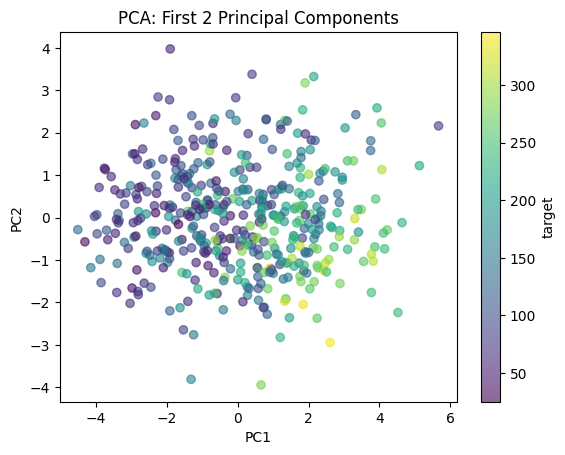

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("\n PCA Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA: First 2 Principal Components")
plt.colorbar(label='target')
plt.show()



 LDA Explained Variance Ratio:
[0.95914876 0.04085124]


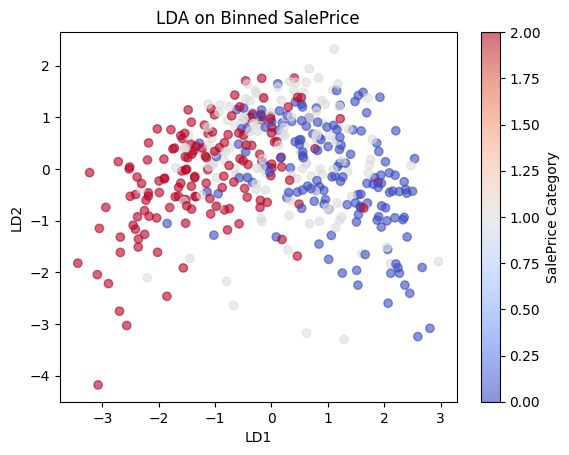

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas as pd

y_cat = pd.qcut(y, q=3, labels=["Low", "Medium", "High"])

lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y_cat)

print("\n LDA Explained Variance Ratio:")
print(lda.explained_variance_ratio_)

plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y_cat.cat.codes, cmap="coolwarm", alpha=0.6)
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.title("LDA on Binned SalePrice")
plt.colorbar(label='SalePrice Category')
plt.show()
